In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

In [2]:
import os

In [3]:
os.chdir(r"C:\Users\ADITI TIWARI\Desktop\Shubhankar\Shubhankar-Laptop\Desktop\SRM FPA\ML\LGR")


In [4]:
df = pd.read_csv("framingham.csv")
df.drop(['education'],axis = 1,inplace = True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.rename(columns = {'male' : 'Sex_male'},inplace = True)

In [6]:
df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
count = 0
for i in df.isnull().sum(axis = 1):
    count = count + 1
print("Total number of missing values:",count)

Total number of missing values: 4240


In [8]:
df.dropna(axis = 0,inplace = True)

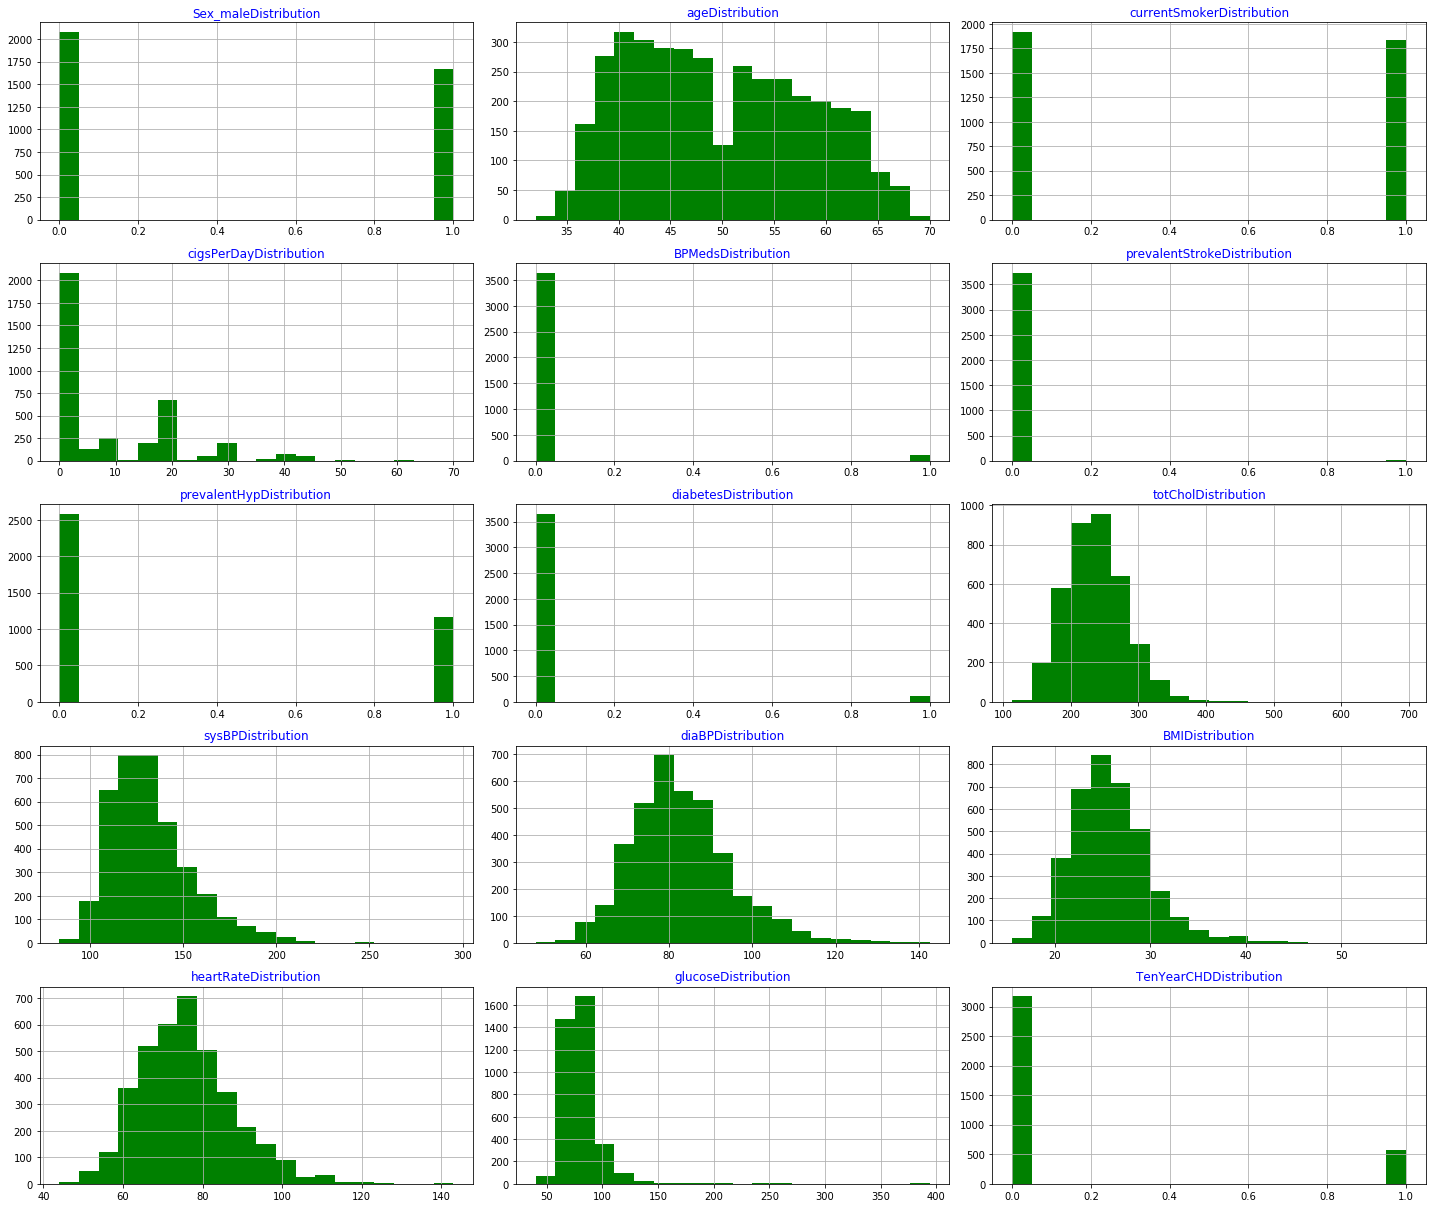

In [9]:
def draw_histograms(dataframe,features,rows,cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        a = fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins = 20,ax=a,facecolor = 'green')
        a.set_title(feature + "Distribution",color = 'blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns,6,3)
        

In [10]:
df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

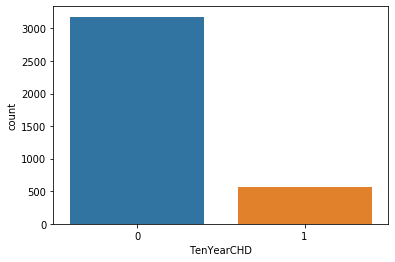

In [11]:
sns.countplot(x = 'TenYearCHD',data = df)

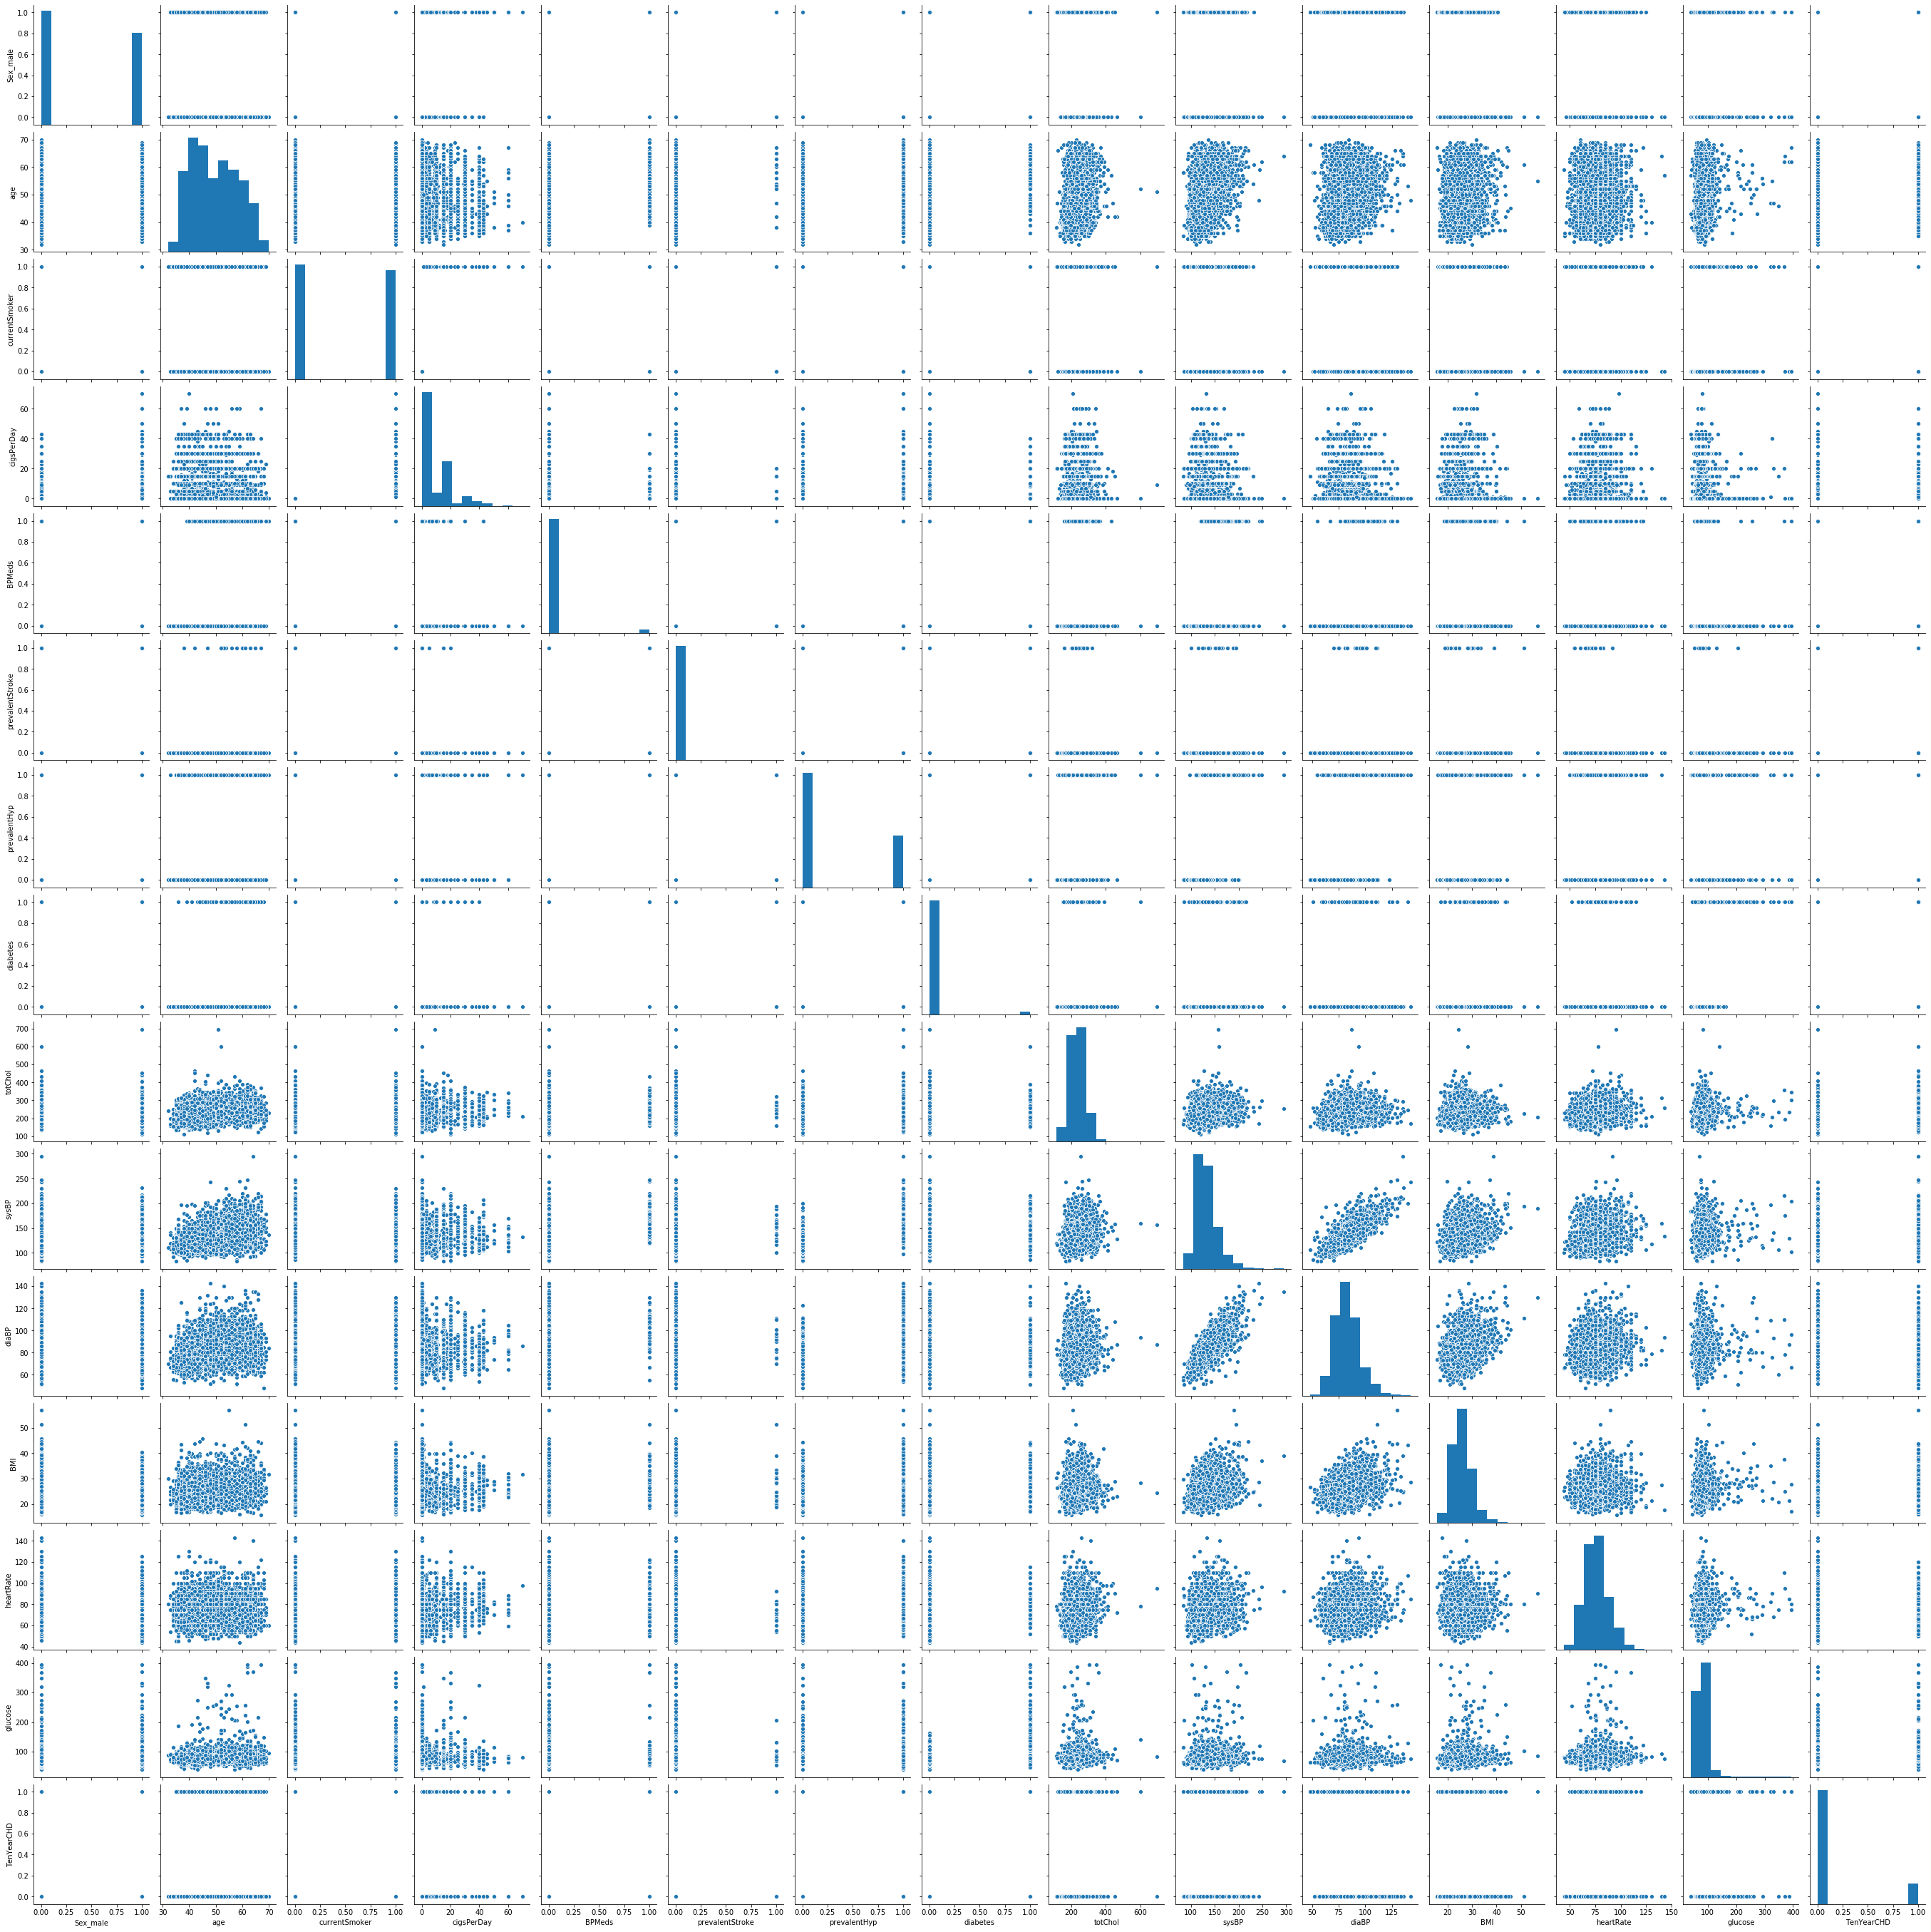

In [12]:
sns.pairplot(df)

In [13]:
df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
from statsmodels.tools import add_constant
df_constant = add_constant(df)
df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
st.chisqprob = lambda chisq,df: st.chi2.sf(chisq,df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD,df_constant[cols])
r = model.fit()
r.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Apr 2020   Pseudo R-squ.:                  0.1170
Time:                        17:19:00   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [16]:
p = np.exp(r.params)

In [17]:
conf = np.exp(r.conf_int())
conf['OR'] = p
pv = round(r.pvalues,3)
conf['pvalue'] = pv
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print((conf))


                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000045       0.000672    0.000175   0.000
Sex_male             1.438535       2.191813    1.775669   0.000
age                  1.052625       1.079972    1.066211   0.000
currentSmoker        0.795259       1.457747    1.076702   0.633
cigsPerDay           1.006384       1.030813    1.018526   0.003
BPMeds               0.733114       1.822247    1.155817   0.533
prevalentStroke      0.787320       5.353300    2.052988   0.141
prevalentHyp         0.948309       1.618428    1.238858   0.116
diabetes             0.543596       1.847705    1.002200   0.994
totChol              1.000131       1.004381    1.002254   0.037
sysBP                1.008012       1.022983    1.015470   0.000
diaBP                0.983708       1.008537    0.996045   0.533
BMI                  0.985916       1.035488    1.010398   0.408
heartRate            0.989624       1.005885    0.997722   0.583
glucose              1.00

In [18]:
import sklearn

In [19]:
new_frs = df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x = new_frs.iloc[:,:-1]
y = new_frs.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state = 5)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lgr = LogisticRegression()
lgr.fit(x_test,y_test)
y_pred = lgr.predict(x_test)

In [22]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8788282290279628

In [23]:
from sklearn.metrics import confusion_matrix

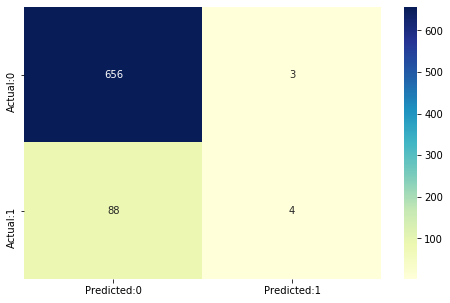

In [24]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix,annot = True,fmt = 'd',cmap = 'YlGnBu')

In [25]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [26]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8788282290279628 
 The Missclassification = 1-Accuracy =  0.12117177097203724 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.043478260869565216 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9954476479514416 
 Positive Predictive value = TP/(TP+FP) =  0.5714285714285714 
 Negative predictive Value = TN/(TN+FN) =  0.8817204301075269 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  9.550724637681169 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9608960763520679


In [27]:
y_pred_prob=lgr.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['No Heart Disease (0)','Heart Disease (1)'])



In [28]:
y_pred_prob_df.head()

,No Heart Disease (0),Heart Disease (1)
0,0.910565,0.089435
1,0.963667,0.036333
2,0.823146,0.176854
3,0.857998,0.142002
4,0.916635,0.083365


In [29]:
from sklearn.preprocessing import binarize

In [30]:
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=lgr.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[399 260]
 [ 23  69]] 
 with 468 correct predictions and 23 Type II errors( False Negatives) 

 Sensitivity:  0.75 Specificity:  0.6054628224582701 



With 0.2 threshold the Confusion Matrix is  
 [[570  89]
 [ 52  40]] 
 with 610 correct predictions and 52 Type II errors( False Negatives) 

 Sensitivity:  0.43478260869565216 Specificity:  0.8649468892261002 



With 0.3 threshold the Confusion Matrix is  
 [[624  35]
 [ 73  19]] 
 with 643 correct predictions and 73 Type II errors( False Negatives) 

 Sensitivity:  0.20652173913043478 Specificity:  0.9468892261001517 



With 0.4 threshold the Confusion Matrix is  
 [[649  10]
 [ 85   7]] 
 with 656 correct predictions and 85 Type II errors( False Negatives) 

 Sensitivity:  0.07608695652173914 Specificity:  0.9848254931714719 





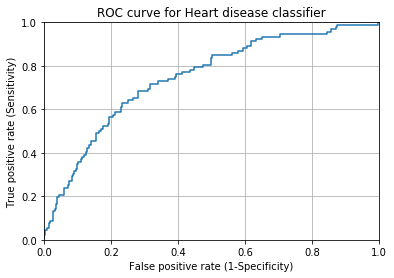

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [32]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7459754568846076